#HW4_question_1

##import libraries

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

##neural network


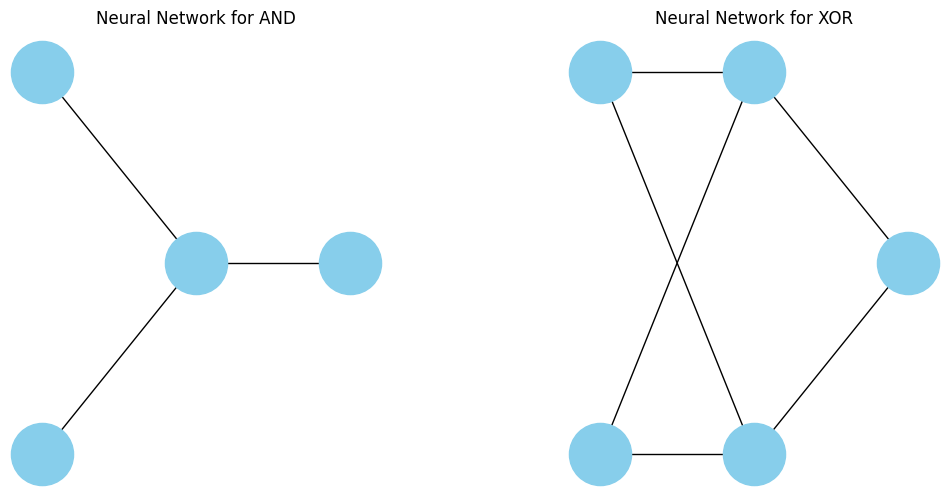

In [ ]:
def draw_neural_net(ax, layer_sizes):
    """
    Draw a neural network cartoon using matplotlib.
    """
    n_layers = len(layer_sizes)
    v_spacing = (1. / max(layer_sizes)) * 0.8
    h_spacing = 1.0 / (n_layers - 1)
    node_size = 2000
    node_color = 'skyblue'
    edge_color = 'black'
    # Create a new graph and position dict
    G = nx.Graph()
    pos = {}

    for i in range(n_layers):
        layer_top = v_spacing * (layer_sizes[i] - 1) / 2.0
        for j in range(layer_sizes[i]):
            node = (i, j)
            pos[node] = (i * h_spacing, layer_top - j * v_spacing)
            G.add_node(node)

            if i > 0:
                for k in range(layer_sizes[i - 1]):
                    G.add_edge((i - 1, k), node)

    nx.draw(G, pos, ax=ax, node_size=node_size, node_color=node_color, edge_color=edge_color, with_labels=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)
# Draw the network for the AND operator
draw_neural_net(axes[0], [2, 1, 1])
axes[0].set_title("Neural Network for AND")

# Draw the network for the XOR operator
draw_neural_net(axes[1], [2, 2, 1])
axes[1].set_title("Neural Network for XOR")

plt.show()


#HW4_question_4

##import libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

### Functions to check if a point is inside the triangle or square


In [ ]:
def is_inside_triangle(x, y):
    # Triangle vertices
    x1, y1 = 0, 2.5
    x2, y2 = 3, 0
    x3, y3 = 6, 5
    # Check if the point is inside the triangle
    denominator = ((y2 - y3)*(x1 - x3) + (x3 - x2)*(y1 - y3))
    a = ((y2 - y3)*(x - x3) + (x3 - x2)*(y - y3)) / denominator
    b = ((y3 - y1)*(x - x3) + (x1 - x3)*(y - y3)) / denominator
    c = 1 - a - b
    return 0 <= a <= 1 and 0 <= b <= 1 and 0 <= c <= 1

def is_inside_square(x, y):
    return -2 <= x <= 0 and 0 <= y <= 2

## Generate synthetic dataset


In [ ]:
def generate_data(num_samples):
    data = []
    labels = []
    for _ in range(num_samples):
        x = np.random.uniform(-2, 6)
        y = np.random.uniform(0, 5)
        # Class 1 if inside the triangle or square, else Class 2
        label = int(is_inside_triangle(x, y) or is_inside_square(x, y))
        data.append([x, y])
        labels.append(label)
    return np.array(data), np.array(labels)

### Create training and test datasets


In [ ]:
X_train, y_train = generate_data(5000)  # 5000 samples for training
X_test, y_test = generate_data(1000)  # 1000 samples for testing

### Define the neural network model


In [ ]:
model = Sequential([
    Dense(7, input_shape=(2,), activation='relu'),  # Hidden layer with 7 neurons
    Dense(1, activation='sigmoid')  # Output layer
])

## Compile the model


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train the model


In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)

## Evaluate the model on test data


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Loss: 0.10104084759950638, Accuracy: 0.968999981880188


## Predict classes for test data

In [ ]:
y_pred = model.predict(X_test).round()

32/32 [==============================] - 0s 2ms/step


## Plotting the test dataset with predicted classes


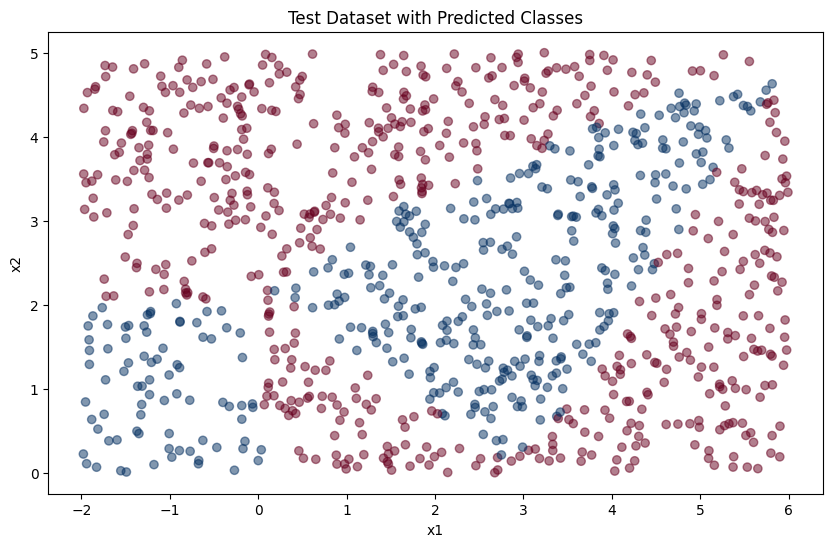

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred.flatten(), cmap=plt.cm.RdBu, alpha=0.5)
plt.title('Test Dataset with Predicted Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Plotting the learning curve


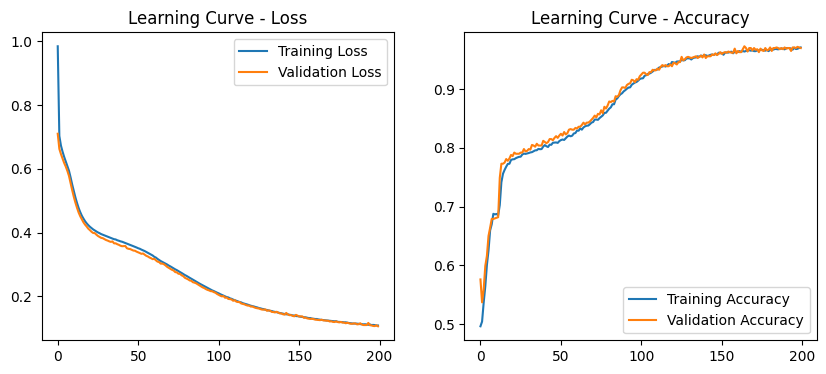

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()
plt.show()

#HW4_question_5

##import necessary libraries

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

##load data

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## preprocessing

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

## Convert labels to categorical


In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Split training data into training and validation sets


In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

## Define the model architecture

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

## Compile the model


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model


In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(val_images, val_labels))

Epoch 1/10
375/375 [==============================] - 4s 6ms/step - loss: 0.3150 - accuracy: 0.9099 - val_loss: 0.1607 - val_accuracy: 0.9540
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1372 - accuracy: 0.9604 - val_loss: 0.1084 - val_accuracy: 0.9686
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0922 - accuracy: 0.9735 - val_loss: 0.0878 - val_accuracy: 0.9738
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9790 - val_loss: 0.0802 - val_accuracy: 0.9759
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.0746 - val_accuracy: 0.9775
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0748 - val_accuracy: 0.9782
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9894 - val_loss: 0.0698 - val_accuracy: 0.9782
Epoch 

## Evaluate the model on the test set


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 0.9820


## Generate predictions and confusion matrix


In [ ]:
predictions = model.predict(test_images)
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))

313/313 [==============================] - 1s 2ms/step


## *Plotting*

### Accuracy  & loss plot

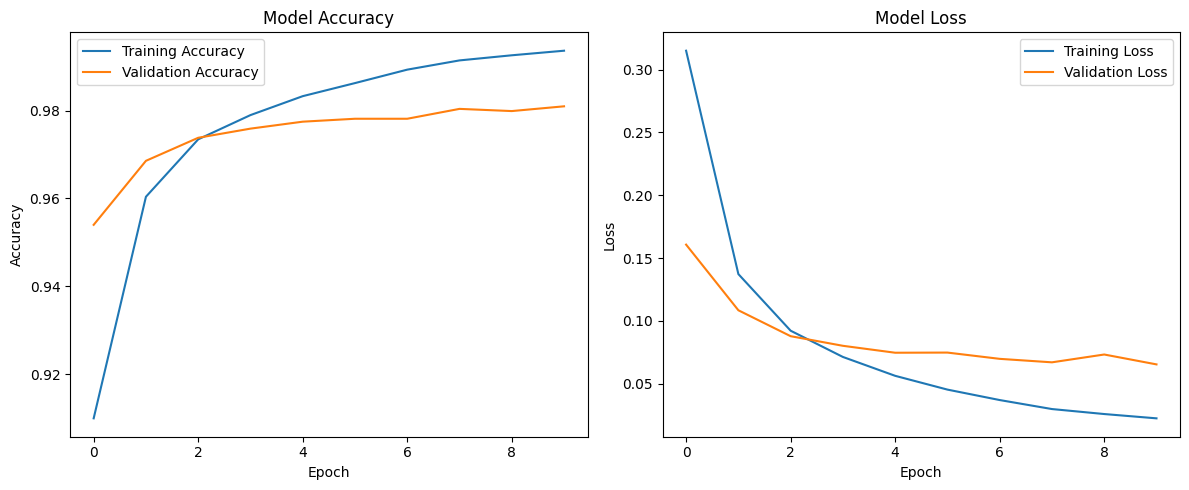

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


plt.tight_layout()
plt.show()

### Confusion matrix plot


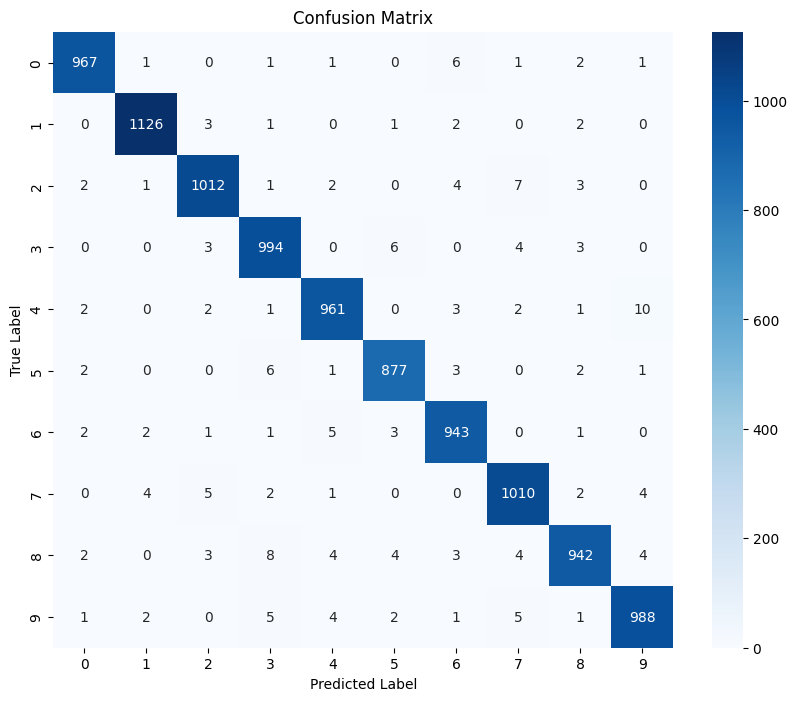

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



##Test and Training accuracy

In [ ]:
(test_accuracy, test_loss)

(0.9819999933242798, 0.06075868383049965)

#HW4_question_5_Bouns_1: CNN

---





##libraries

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

## Load and preprocess the data


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Define the CNN architecture

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

## Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 [==============================] - 6s 6ms/step - loss: 0.3322 - accuracy: 0.8966 - val_loss: 0.0773 - val_accuracy: 0.9776
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1050 - accuracy: 0.9693 - val_loss: 0.0571 - val_accuracy: 0.9842
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0752 - accuracy: 0.9772 - val_loss: 0.0458 - val_accuracy: 0.9872
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0401 - val_accuracy: 0.9883
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0530 - accuracy: 0.9842 - val_loss: 0.0365 - val_accuracy: 0.9893
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0370 - val_accuracy: 0.9895
Epoch 7/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0416 - accuracy: 0.9870 - val_loss: 0.0377 - val_accuracy: 0.9902
Epoch 

## Evaluate the model on the test set


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0276 - accuracy: 0.9911


## Generate predictions and the confusion matrix

In [ ]:
predictions = model.predict(test_images)
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))

313/313 [==============================] - 1s 2ms/step


## Plot the learning curves


## Plot training & validation accuracy values

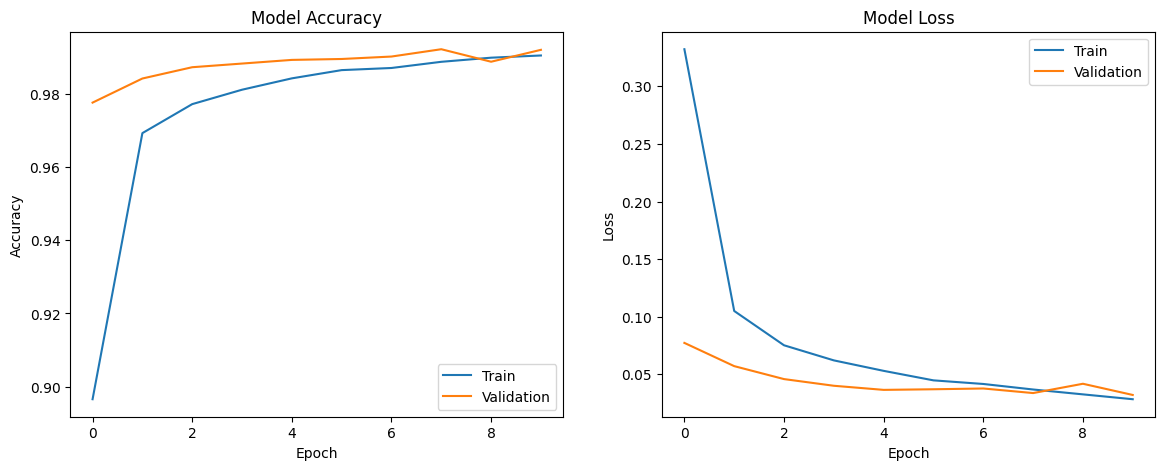

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



##plotting confusion matrix

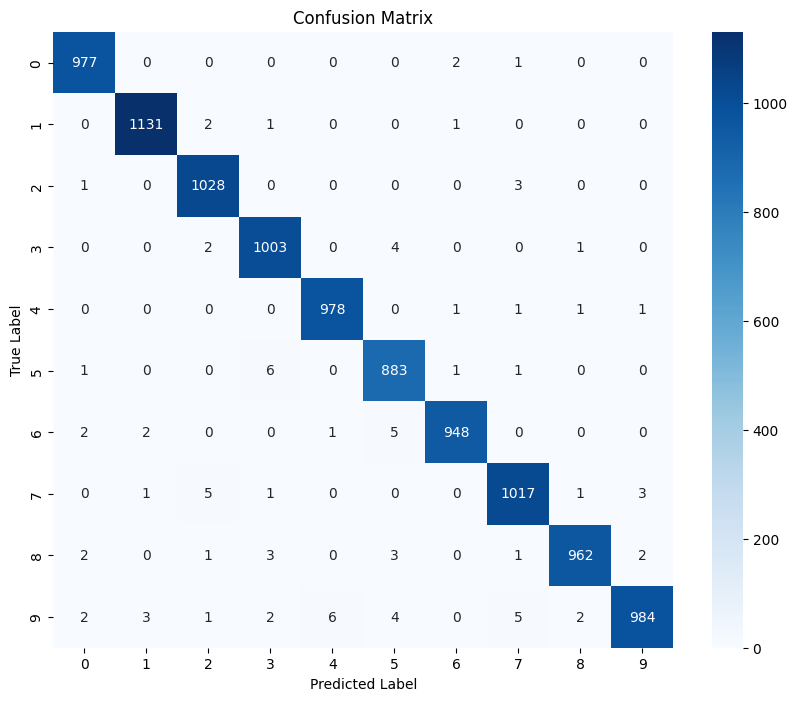

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


#HW4_question_5_Bonus_2: MobileNet

##import libraries

In [ ]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torch.optim.lr_scheduler import StepLR
from torch.nn import CrossEntropyLoss
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Initial settings


In [ ]:
batch_size = 64
epochs = 10
lr = 0.01
gamma = 0.7

## Data preprocessing transformations


In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

## Load MNIST dataset


In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 176174986.52it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 50326420.37it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 52707766.03it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 20684613.21it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Initialize the network


In [ ]:
model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
model.classifier[1] = torch.nn.Linear(model.last_channel, 10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 125MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

## Loss and optimizer


In [ ]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

## Lists to store metrics for plotting


In [ ]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

## Training loop


In [ ]:
for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct_train = 0
    total_train = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct_train += pred.eq(target.view_as(pred)).sum().item()
        total_train += target.size(0)
        loss.backward()
        optimizer.step()

    train_loss /= len(train_loader)
    train_acc = 100. * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    scheduler.step()

## Testing loop



In [ ]:
    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct_test += pred.eq(target.view_as(pred)).sum().item()
            total_test += target.size(0)

    test_loss /= len(test_loader)
    test_acc = 100. * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

## Print test set results


In [ ]:
print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct_test}/{len(test_loader.dataset)} ({test_acc:.0f}%)')


Test set: Average loss: 0.0122, Accuracy: 9961/10000 (100%)


## Confusion matrix plotting


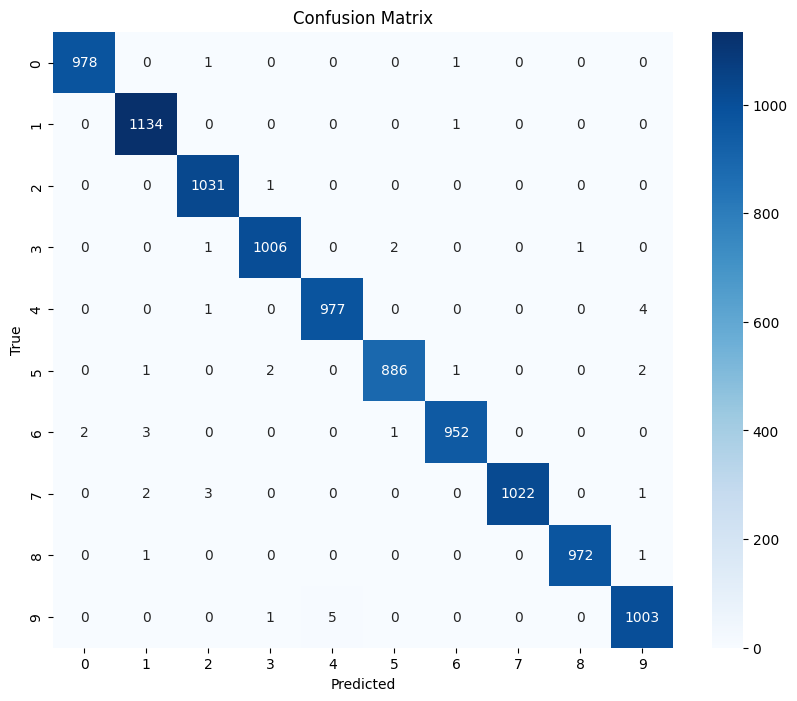

In [ ]:
confusion_mtx = np.zeros((10, 10), dtype=int)
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        for t, p in zip(target.view(-1), pred.view(-1)):
            confusion_mtx[t.long(), p.long()] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Plot training & validation accuracy and loss values

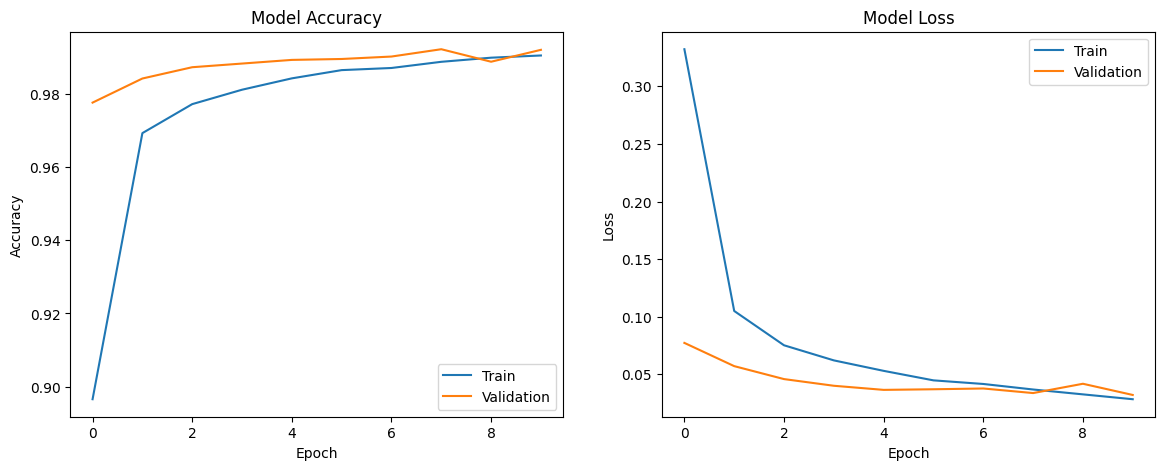

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


#HW4_question_6

## import necessary libraries

In [1]:
import numpy as np
from math import log
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##compute_entropy

In [2]:
def compute_entropy(class1_count, class2_count):
    total_count = class1_count + class2_count
    if total_count == 0 or class1_count == 0 or class2_count == 0:
        return 0
    entropy_class1 = -(class1_count / total_count) * log(class1_count / total_count, 2)
    entropy_class2 = -(class2_count / total_count) * log(class2_count / total_count, 2)
    return entropy_class1 + entropy_class2

def compute_info_gain(feature_data, target_data):
    unique_values = np.unique(feature_data)
    total_samples = len(feature_data)
    overall_entropy = compute_entropy(np.sum(target_data == 0), np.sum(target_data == 1))
    weighted_entropy = 0
    for value in unique_values:
        subset_mask = feature_data == value
        subset_target = target_data[subset_mask]
        entropy_subset = compute_entropy(np.sum(subset_target == 0), np.sum(subset_target == 1))
        weighted_entropy += (np.sum(subset_mask) / total_samples) * entropy_subset
    return overall_entropy - weighted_entropy


##Define DecisionTreeNode

In [3]:
class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, leaf_value=None, current_depth=0, child_nodes=None, max_depth=3):
        self.max_depth = max_depth
        self.feature_index = feature_index
        self.threshold = threshold
        self.leaf_value = leaf_value
        self.current_depth = current_depth
        self.child_nodes = child_nodes or []
        self.is_leaf_node = self.current_depth == max_depth

    def optimal_feature(self, features, targets):
        info_gains = [compute_info_gain(features[column], targets) for column in features.columns]
        return np.argmax(info_gains)

    def build(self, X, y):
        if len(set(y)) == 1 or not X.columns.size:
            self.is_leaf_node = True
            self.leaf_value = np.argmax(np.bincount(y))
        elif self.current_depth < self.max_depth:
            best_feat_index = self.optimal_feature(X, y)
            self.feature_index = best_feat_index
            feature_values = np.unique(X.iloc[:, best_feat_index])
            for value in feature_values:
                sub_X, sub_y = X[X.iloc[:, best_feat_index] == value], y[X.iloc[:, best_feat_index] == value]
                child_node = DecisionTreeNode(current_depth=self.current_depth + 1, max_depth=self.max_depth)
                child_node.build(sub_X.drop(sub_X.columns[best_feat_index], axis=1), sub_y)
                self.child_nodes.append((value, child_node))
        else:
            self.is_leaf_node = True
            self.leaf_value = np.argmax(np.bincount(y))

    def classify_sample(self, instance):
        if self.is_leaf_node:
            return self.leaf_value
        for value, node in self.child_nodes:
            if instance[self.feature_index] == value:
                return node.classify_sample(instance)

    def predict(self, X):
        predictions = [self.classify_sample(X.iloc[i, :]) for i in tqdm(range(len(X)))]
        return np.array(predictions)


##Loading and some preprocessing

In [5]:
# Reading the dataset directly from the local directory
dataset_train = pd.read_csv('/content/adult.train.10k.discrete')


# Define a function to map labels to numerical values
def map_labels(label):
    return 0 if label == "<=50K" else 1

# Convert labels to binary (0 or 1) using the mapping function
converted_labels = np.array([map_labels(label) for label in dataset_train['<=50K']])

# Extracting features and labels for training
features_train = dataset_train.iloc[:, 1:]  # Extracting training features
labels_train = converted_labels             # Extracting training labels


##model

In [6]:
# Creating an instance of the DecisionTreeNode class with a maximum depth of 3
decision_tree_model = DecisionTreeNode(max_depth=3)

# Training the decision tree model using the training data and labels
decision_tree_model.build(features_train, labels_train)

## Test loading and  its labeling step

In [7]:
cols = dataset_train.columns
# Reading the test dataset from a specified path
df_test = pd.read_csv('/content/adult.test.10k.discrete')

# Defining a function for mapping string labels to numeric values
label_mapping_test = {"<=50K": 0, ">50K": 1}

# Aligning columns of the test dataset with the train dataset
df_test.columns = cols

# Converting string labels in the test dataset to binary (0s and 1s)
binary_labels_test = np.array([label_mapping_test[label] for label in df_test['<=50K']])

# Extracting features from the test dataset
test_data = df_test[df_test.columns[1:]]  # This is the test dataset


##predictions

In [8]:
# Generating predictions for the training dataset using the trained decision tree model
predictions_train = decision_tree_model.predict(features_train)

# Generating predictions for the test dataset using the trained decision tree model
predictions_test = decision_tree_model.predict(test_data)


100%|██████████| 9999/9999 [00:00<00:00, 10957.98it/s]


##confusion matrix

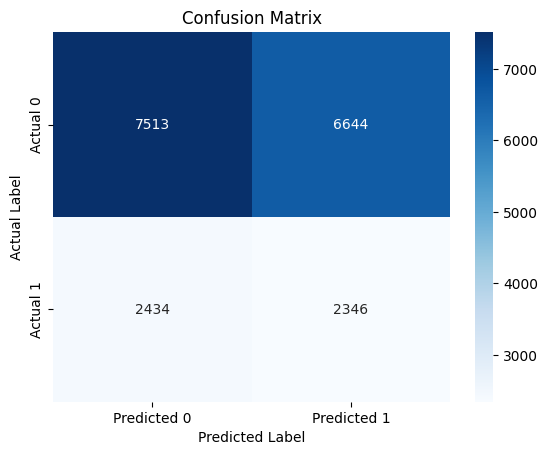

In [9]:
def compute_confusion_matrix(true, pred):
    K = len(np.unique(true))  # Number of classes
    result = np.zeros((K, K), dtype=int)  # Initialize with integer type

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

# Calculating confusion matrix without sklearn
cm = compute_confusion_matrix(binary_labels_test, predictions_test)

# Creating a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Adding labels and title
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

# Displaying the plot
plt.show()

##performance - metrics

In [10]:
def calculate_performance_metrics(labels, predictions):
    TP = FP = TN = FN = 0
    for true, pred in zip(labels, predictions):
        if true == 1 and pred == 1:
            TP += 1
        elif true == 1 and pred == 0:
            FN += 1
        elif true == 0 and pred == 1:
            FP += 1
        elif true == 0 and pred == 0:
            TN += 1

    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0

    return accuracy, precision, recall, f1_score

# Print performance metrics for the test dataset
accuracy_test, precision_test, recall_test, f1_score_test = calculate_performance_metrics(binary_labels_test, predictions_test)
print(f"Test Data - Accuracy: {accuracy_test}, Precision: {precision_test}, Recall: {recall_test}, F1-Score: {f1_score_test}")

# Print performance metrics for the training dataset
accuracy_train, precision_train, recall_train, f1_score_train = calculate_performance_metrics(labels_train, predictions_train)
print(f"Training Data - Accuracy: {accuracy_train}, Precision: {precision_train}, Recall: {recall_train}, F1-Score: {f1_score_train}")


Test Data - Accuracy: 0.8680490103675778, Precision: 0.5192307692307693, Recall: 0.19014084507042253, F1-Score: 0.27835051546391754
Training Data - Accuracy: 0.8956999085086916, Precision: 0.8, Recall: 0.37735849056603776, F1-Score: 0.5128205128205128
